In [23]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

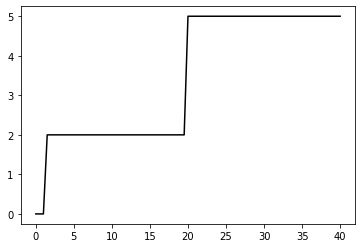

In [24]:
model = GEKKO()
time_steps = 40
steps = np.zeros(2 * time_steps + 1)
steps[3:40] = 2.0
steps[40:] = 5.0

model.time = np.linspace(0, time_steps, 2*time_steps+1)
set_point = model.Param(value=steps)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.show()


In [25]:
output = model.Var (value = 0.0) # controller output
output_const = model.Const (value = 0.0) # controller output bias
process_variable = model.Var(value = 0.0) # process variable
err = model.Intermediate(set_point - process_variable) # set point error
err_intgl = model.Var(value = 0.0) # error integr

In [26]:
# Controller model
Kp = 15.0 # controller P gain
Ki = 2 # controller I gain
Kd = 1 # derivative constant
model.Equation(err_intgl.dt() == err) # error integral
model.Equation(output == output_const + Kp*err + Ki * err_intgl - Kd*process_variable.dt())

In [27]:
# Process model
Kprocess = 0.5 # process gain
tauP = 10.0 # process time constant
model.Equation(tauP * process_variable.dt() + process_variable == Kprocess*output)

In [28]:
model.options.IMODE=4
model.solve(disp=True)

apm 79.183.120.132_gk_model4 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            1
   Variables    :            4
   Intermediates:            1
   Connections  :            0
   Equations    :            4
   Residuals    :            3
 
 Number of state variables:            400
 Number of total equations: -          400
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains 

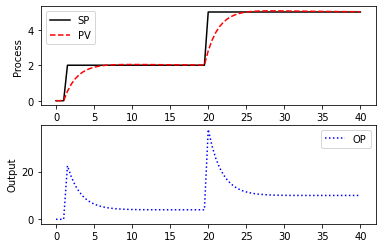

In [29]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(model.time, set_point.value, 'k-', label='SP')
plt.plot(model.time, process_variable.value,'r--',label='PV')
plt.xlabel('Time (sec)')
plt.ylabel('Process')
plt.legend()
plt.subplot(2,1,2)
plt.plot(model.time, output.value,'b:',label='OP')
plt.ylabel('Output')
plt.legend()
plt.show()